In [106]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [67]:
def dist(U,N):
    random.seed(10)
    d=500
    i=0
    c=set()
    User=[]
    Base=[]
    while len(c)<U+N:
        x=random.uniform(0,d)
        y=random.uniform(0,d)
        c.add((x,y))
    for (x,y) in c:
        if(i<U):
            User.append((x,y))
        else:
            Base.append((x,y))
        i=i+1
    return (User,Base)
    

In [180]:
def plot_map(s1,c1,s2,c2):
    X1=[]
    Y1=[]
    X2=[]
    Y2=[]
    numusers=len(s1)
    numbs=len(s2)
    for (x,y) in s1:
        X1.append(x)
        Y1.append(y)
    for (x,y) in s2:
        X2.append(x)
        Y2.append(y)
    plt.scatter(X1,Y1,color=c1,)
    plt.scatter(X2,Y2,color=c2)
    plt.xlabel('X')
    plt.xlim(-100,800)
    plt.ylim(-100,800)
    plt.ylabel('Y')
    plt.title("map for "+str(numusers)+" users and "+str(numbs)+" base stations")
    plt.legend(["users", "base station"], loc ="upper right")

In [181]:
def channel_gain(User,Base,H,g0,U,N):
    g=np.zeros((U,N))
    for i in range(U):
        (Ux,Uy)=User[i]
        for j in range(N):
            (Bx,By)=Base[j]
            d=(Ux-Bx)**2 + (Uy-By)**2 + H**2
            g[i][j]=g0/d
    return g
    

In [182]:
def power_allocation(g,sigma_0,pmax,Iu,B,U,N):
    p=pmax*np.ones((U,N))
    r=0
    while r<50000:
        for i in range(U):
            r=r+1
            mu_r=0.1/np.sqrt(r)
            den=sigma_0 + (g*p).sum(axis=0) - g[i]*p[i]
            gamma=g[i,:]/den
        hpun=np.log2(1+gamma*p)
        gpun=np.log(2*(1+gamma*p))
        denr=B*(gpun*hpun*hpun)
        del_r=mu_r*(Iu*(hpun*gpun - gamma*p))/denr
        p=p-del_r
        bool_p=p>0
        p=bool_p*p
    return p
            

[[3.99440886 3.93535465 3.93653491 3.94141691 3.93974147]
 [3.9961403  3.95535893 3.95617586 3.9595534  3.95839454]
 [3.99486694 3.94064581 3.94173012 3.94621474 3.94467578]
 [3.99469125 3.93861634 3.93973747 3.94437455 3.94278323]
 [3.99439003 3.93513721 3.9363214  3.94121972 3.93953868]
 [3.99619674 3.95601122 3.95681626 3.96014465 3.95900267]
 [3.99558211 3.94890846 3.94984273 3.953706   3.95238039]
 [3.99476027 3.93941363 3.9405203  3.94509749 3.94352674]
 [3.99466615 3.93832641 3.9394528  3.94411166 3.94251286]
 [3.99535002 3.94622676 3.94720975 3.95127479 3.94987991]
 [3.99414526 3.93231037 3.93354577 3.93865623 3.93690233]
 [3.99572638 3.95057546 3.95147941 3.95521722 3.95393468]
 [3.99613403 3.95528646 3.9561047  3.9594877  3.95832697]
 [3.99457202 3.93723919 3.93838528 3.9431258  3.94149895]
 [3.99467242 3.93839889 3.93952396 3.94417738 3.94258045]
 [3.99519319 3.94441477 3.94543068 3.949632   3.94819032]
 [3.99600233 3.95376445 3.9546104  3.95810806 3.95690797]
 [3.99544411 3

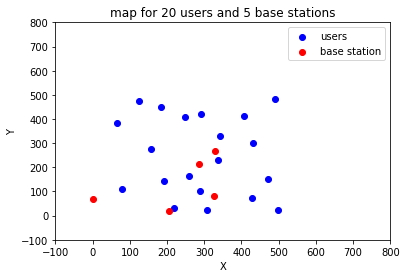

In [186]:
U=20 #number of users
N=5  #number of Base stations
H=0 #BS hieght in (m)
g0=10 #channel gain at a dist of 1m
pmax=4 #maximum transmission power of user
B=20*(10**6) # Bandwidth
random.seed(10)
Iu=[]
for i in range(U):
    Iu.append(random.randint(600,1000))
Iu=1024*np.reshape(Iu,(20,1))
sigma_0=10**-13
User,Base=dist(U,N)
plot_map(User,"blue",Base,"red")
g=channel_gain(User,Base,H,g0,U,N)
pa=power_allocation(g,sigma_0,pmax,Iu,B,U,N)
print(pa)